In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from model import *
from data import *
from analysis import *

In [5]:
oiii = for_oiii()
oiii_res = np.loadtxt("../output/oiii.res")

initial: 105783
select redshift: 19083
select wise: 15666


In [6]:
oiii_ = oiii[oiii["loglbol"] > 46]

(array([265., 541., 410., 285., 138.,  73.,  53.,  33.,  19.,  19.,  19.,
          8.,   6.,   0.,   2.,   2.,   2.,   1.,   1.,   3.]),
 array([  1.68874021,  14.17792769,  26.66711517,  39.15630265,
         51.64549013,  64.13467761,  76.62386509,  89.11305257,
        101.60224005, 114.09142753, 126.58061501, 139.06980249,
        151.55898997, 164.04817745, 176.53736493, 189.02655241,
        201.51573989, 214.00492737, 226.49411485, 238.98330233,
        251.47248982]),
 <a list of 20 Patch objects>)

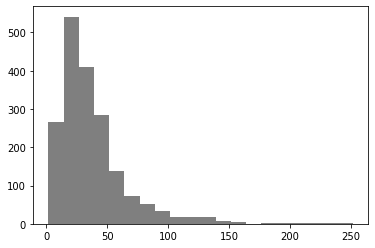

In [7]:
oiii_tmp = oiii_res[:,-2][oiii_res[:,-2]<300]
plt.hist(oiii_tmp, bins=20, color="tab:gray")

In [8]:
cond = (oiii_res[:,3] > -0.5) & (oiii_res[:,-2] < 50)
oiii_ = oiii_[cond]
oiii_res = oiii_res[cond]

In [9]:
oiii_loglbol = np.log10(5) + disk_powlaw_(np.log10(0.3)) + oiii_res[:,0]

In [10]:
oiii_loglbol[:5]

array([46.41370592, 46.12761856, 46.0346037 , 45.99778747, 46.08486065])

In [11]:
%run analysis.py

In [12]:
oiii_ans = np.array([analysis(i) for i in oiii_res])

In [13]:
import seaborn as sb

In [14]:
from scipy.optimize import lsq_linear

A = np.ones((len(oiii_), 2))
A[:,0] = oiii_loglbol
y = oiii_ans[:,-1]
res = lsq_linear(A, y)
k, b = res.x

In [15]:
def fit(xs, ys):
    A = np.ones((len(xs), 2))
    A[:,0] = xs
    res = lsq_linear(A, ys)
    return res.x

In [16]:
oiii_logbh = oiii_["logbh_hb_vp06"].copy()
for i in range(len(oiii_logbh)):
    if oiii_logbh[i] == 0:
        oiii_logbh[i] = oiii_[i]["logbh"]

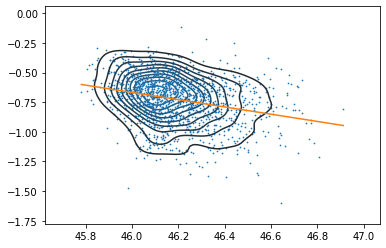

In [17]:
sb.kdeplot(oiii_loglbol, oiii_ans[:,-1])
plt.scatter(oiii_loglbol, oiii_ans[:,-1], s=0.5)

x = np.array([np.min(oiii_loglbol), np.max(oiii_loglbol)])
plt.plot(x, k * x + b)

array([[ 1.        , -0.13246166],
       [-0.13246166,  1.        ]])

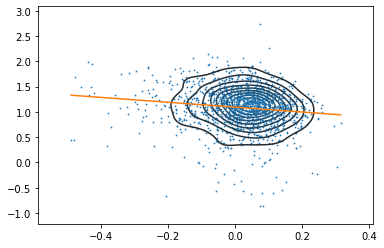

In [18]:
sb.kdeplot(oiii_res[:,3], np.log10(oiii_["ew_oiii_5007"]))
plt.scatter(oiii_res[:,3], np.log10(oiii_["ew_oiii_5007"]), s=0.5)
k, b = fit(oiii_res[:,3], np.log10(oiii_["ew_oiii_5007"]))
x = np.array([np.min(oiii_res[:,3]), np.max(oiii_res[:,3])])
plt.plot(x, k * x + b)

np.corrcoef(oiii_res[:,3], np.log10(oiii_["ew_oiii_5007"]))

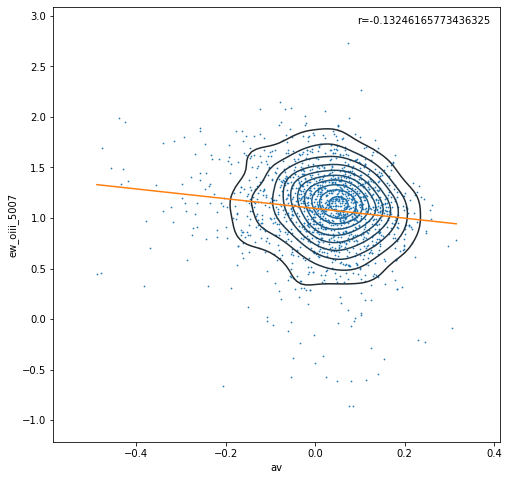

In [19]:
plt.figure(figsize=(8,8))
sb.kdeplot(oiii_res[:,3], np.log10(oiii_["ew_oiii_5007"]))
plt.scatter(oiii_res[:,3], np.log10(oiii_["ew_oiii_5007"]), s=0.5)
k, b = fit(oiii_res[:,3], np.log10(oiii_["ew_oiii_5007"]))
x = np.array([np.min(oiii_res[:,3]), np.max(oiii_res[:,3])])
plt.plot(x, k * x + b)
plt.xlabel("av")
plt.ylabel("ew_oiii_5007")
plt.plot([],[],' ',label=f"r={np.corrcoef(oiii_res[:,3], np.log10(oiii_['ew_oiii_5007']))[0,1]}")
plt.legend().get_frame().set_linewidth(0.0)

plt.savefig("/Users/wul/Desktop/fig4.png")

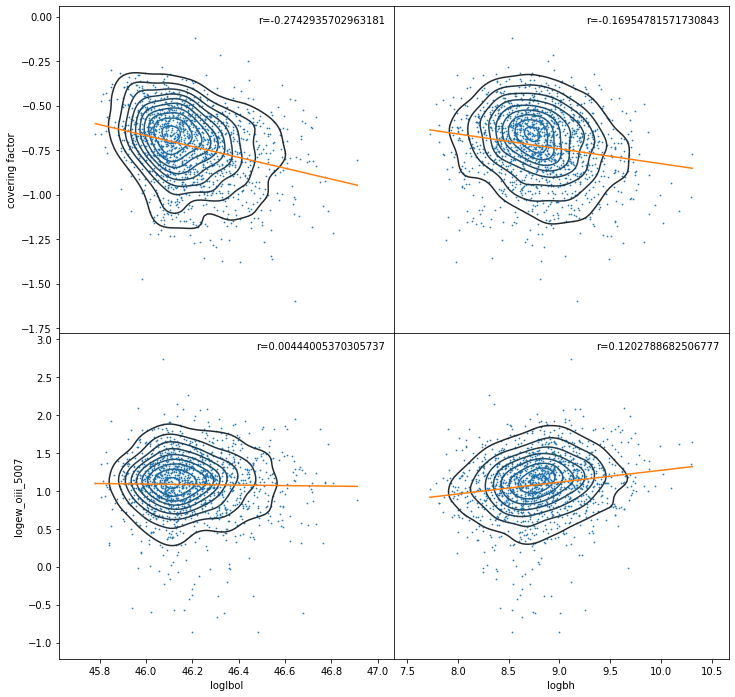

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))

sb.kdeplot(oiii_loglbol, oiii_ans[:,-1], ax=axs[0,0])
axs[0,0].scatter(oiii_loglbol, oiii_ans[:,-1], s=0.5)
k, b = fit(oiii_loglbol, oiii_ans[:,-1])
x = np.array([np.min(oiii_loglbol), np.max(oiii_loglbol)])
axs[0,0].plot(x, k * x + b)
axs[0,0].set_ylabel("covering factor")
axs[0,0].plot([],[],' ',label=f"r={np.corrcoef(oiii_loglbol, oiii_ans[:,-1])[0,1]}")
axs[0,0].legend().get_frame().set_linewidth(0.0)

sb.kdeplot(oiii_logbh, oiii_ans[:,-1], ax=axs[0,1])
axs[0,1].scatter(oiii_logbh, oiii_ans[:,-1], s=0.5)
k, b = fit(oiii_logbh, oiii_ans[:,-1])
x = np.array([np.min(oiii_logbh), np.max(oiii_logbh)])
axs[0,1].plot(x, k * x + b)
axs[0,1].set_yticks([])
axs[0,1].plot([],[],' ',label=f"r={np.corrcoef(oiii_logbh, oiii_ans[:,-1])[0,1]}")
axs[0,1].legend().get_frame().set_linewidth(0.0)

sb.kdeplot(oiii_loglbol, np.log10(oiii_["ew_oiii_5007"]), ax=axs[1,0])
axs[1,0].scatter(oiii_loglbol, np.log10(oiii_["ew_oiii_5007"]), s=0.5)
k, b = fit(oiii_loglbol, np.log10(oiii_["ew_oiii_5007"]))
x = np.array([np.min(oiii_loglbol), np.max(oiii_loglbol)])
axs[1,0].plot(x, k * x + b)
axs[1,0].set_ylabel("logew_oiii_5007")
axs[1,0].set_xlabel("loglbol")
axs[1,0].plot([],[],' ',label=f"r={np.corrcoef(oiii_loglbol, oiii_['ew_oiii_5007'])[0,1]}")
axs[1,0].legend().get_frame().set_linewidth(0.0)

sb.kdeplot(oiii_logbh, np.log10(oiii_["ew_oiii_5007"]), ax=axs[1,1])
axs[1,1].scatter(oiii_logbh, np.log10(oiii_["ew_oiii_5007"]), s=0.5)
k, b = fit(oiii_logbh, np.log10(oiii_["ew_oiii_5007"]))
x = np.array([np.min(oiii_logbh), np.max(oiii_logbh)])
axs[1,1].plot(x, k * x + b)
axs[1,1].set_yticks([])
axs[1,1].set_xlabel("logbh")
axs[1,1].plot([],[],' ',label=f"r={np.corrcoef(oiii_logbh, oiii_['ew_oiii_5007'])[0,1]}")
axs[1,1].legend().get_frame().set_linewidth(0.0)

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("/Users/wul/Desktop/fig1.png")

In [21]:
np.corrcoef(oiii_loglbol, oiii_ans[:,-1])[0,1]

-0.2742935702963181

In [ ]:
np.corrcoef()

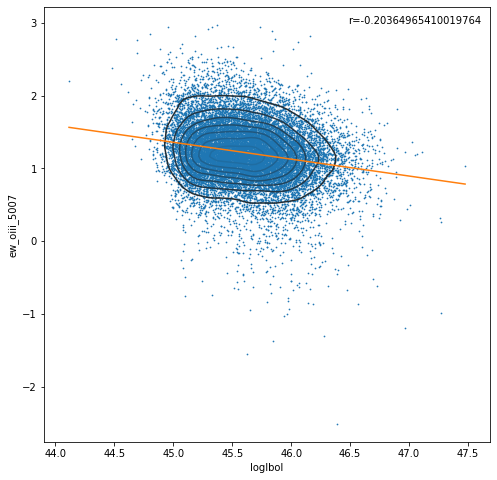

In [31]:
plt.figure(figsize=(8,8))
sb.kdeplot(oiii["loglbol"], np.log10(oiii["ew_oiii_5007"]))
plt.scatter(oiii["loglbol"], np.log10(oiii["ew_oiii_5007"]), s=0.5)
k, b = fit(oiii["loglbol"], np.log10(oiii["ew_oiii_5007"]))
x = np.array([np.min(oiii["loglbol"]), np.max(oiii["loglbol"])])
plt.plot(x, k * x + b)
plt.xlabel("loglbol")
plt.ylabel("ew_oiii_5007")
plt.plot([],[],' ',label=f"r={np.corrcoef(oiii['loglbol'], np.log10(oiii['ew_oiii_5007']))[0,1]}")
plt.legend().get_frame().set_linewidth(0.0)

plt.savefig("/Users/wul/Desktop/fig2.png")

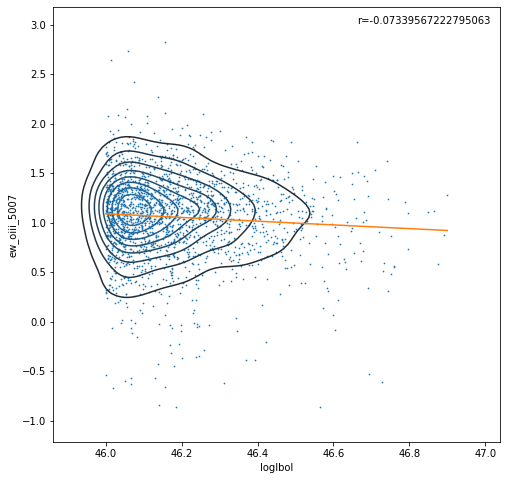

In [32]:
plt.figure(figsize=(8,8))
sb.kdeplot(oiii_["loglbol"], np.log10(oiii_["ew_oiii_5007"]))
plt.scatter(oiii_["loglbol"], np.log10(oiii_["ew_oiii_5007"]), s=0.5)
k, b = fit(oiii_["loglbol"], np.log10(oiii_["ew_oiii_5007"]))
x = np.array([np.min(oiii_["loglbol"]), np.max(oiii_["loglbol"])])
plt.plot(x, k * x + b)
plt.xlabel("loglbol")
plt.ylabel("ew_oiii_5007")
plt.plot([],[],' ',label=f"r={np.corrcoef(oiii_['loglbol'], np.log10(oiii_['ew_oiii_5007']))[0,1]}")
plt.legend().get_frame().set_linewidth(0.0)

plt.savefig("/Users/wul/Desktop/fig3.png")

In [33]:
np.corrcoef(oiii["loglbol"], np.log10(oiii["ew_oiii_5007"]))

array([[ 1.        , -0.20364965],
       [-0.20364965,  1.        ]])

In [34]:
np.corrcoef(oiii_["loglbol"], np.log10(oiii_["ew_oiii_5007"]))

array([[ 1.        , -0.07339567],
       [-0.07339567,  1.        ]])

In [35]:
np.corrcoef(oiii_loglbol, np.log10(oiii_["ew_oiii_5007"]))

array([[ 1.        , -0.00116511],
       [-0.00116511,  1.        ]])

In [36]:
np.corrcoef(oiii_res[:,3], np.log10(oiii_["ew_oiii_5007"]))

array([[ 1.        , -0.14260448],
       [-0.14260448,  1.        ]])

In [41]:
def plot_cors(sim, logew, plt, label=None):
    oiii_sim = sim
    oiii_sim_logew = logew
    oiii_sim_ans_ = np.array([analysis_(i) for i in oiii_sim])
    # oiii_sim_ans = np.array([analysis(i) for i in oiii_sim])
    oiii_sim_cors = [parcor([oiii_sim_logew, oiii_sim_ans_[:,i], oiii_loglbol, oiii_["logbh_hb_vp06"]])[0,1] 
        for i in range(len(oiii_sim_ans_[0,:]))]
    # oiii_sim_cors = [np.corrcoef([oiii_sim_logew, oiii_sim_ans_[:,i]])[0,1] for i in range(len(oiii_sim_ans_[0,:]))]
    x = np.linspace(1,10)
    plt.plot(x, oiii_sim_cors, label=label)

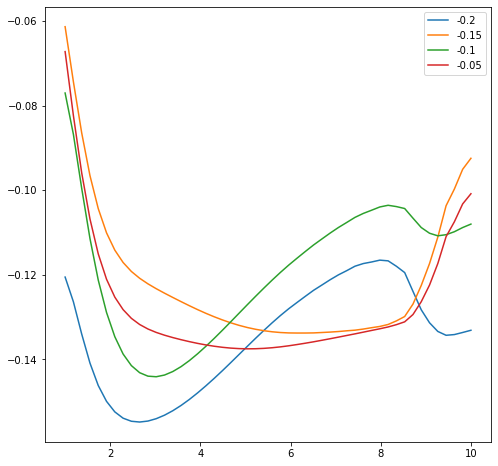

In [42]:
oiii_sims = []
for n in np.arange(-0.2, 0., 0.05):
    oiii_sims.append(np.loadtxt(f"../temp/oiii{n}.sim"))

plt.figure(figsize=(8,8))
for sim, cor in zip(oiii_sims[:9], np.arange(-200, 0, 50)):
    plot_cors(sim[:,:-1], sim[:,-1], plt, label=str(cor/1000))
plt.legend()

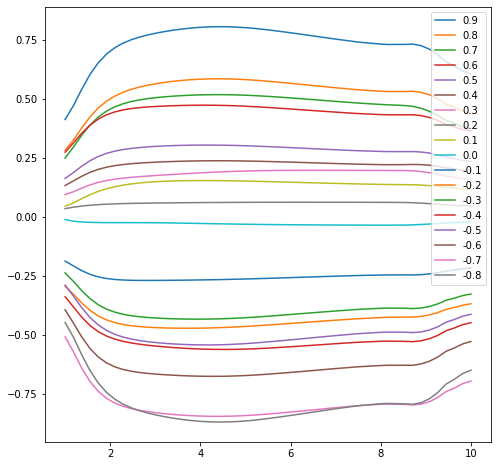

In [180]:
oiii_sims = []
for n in np.arange(-0.9, 0.9, 0.1):
    oiii_sims.append(np.loadtxt(f"../res/res/oiii{n}.sim"))

oiii_sims.reverse()
plt.figure(figsize=(8,8))
for sim, cor in zip(oiii_sims, np.arange(9, -9, -1)):
    plot_cors(sim[:,:-1], sim[:,-1], plt, label=str(cor/10))
plt.legend()
plt.savefig("/Users/wul/Desktop/fig6.png")

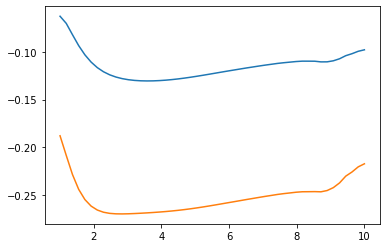

In [124]:
oiii_sims = [np.loadtxt("../res/res/oiii-0.2.sim"), np.loadtxt("../res/res/oiii-0.20000000000000018.sim")]
for sim in oiii_sims:
    plot_cors(sim[:,:-1], sim[:,-1], plt)

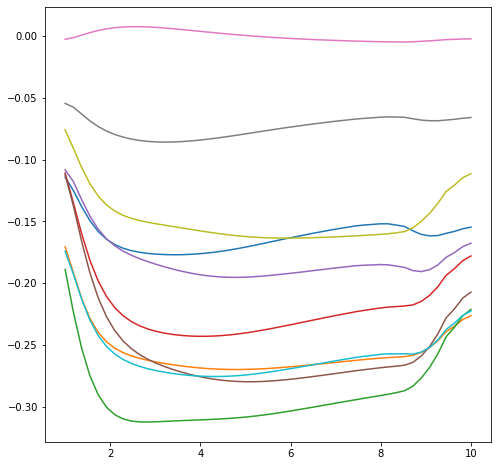

In [177]:
oiii_sims = []
for i in range(10):
    oiii_sims.append(np.loadtxt(f"../test/oiii{i}.sim"))

plt.figure(figsize=(8,8))
i = 0
for sim in oiii_sims:
    plot_cors(sim[:,:-1], sim[:,-1], plt, label=str(i))
    i += 1

plt.savefig("/Users/wul/Desktop/fig5.png")

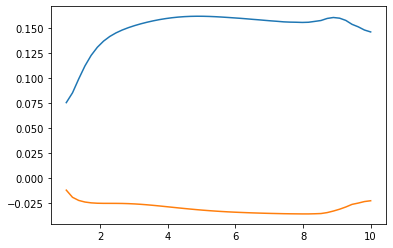

In [125]:
oiii_sims = [np.loadtxt("../res/res/oiii-0.10000000000000003.sim"), np.loadtxt("../res/res/oiii-0.1000000000000002.sim")]
for sim in oiii_sims:
    plot_cors(sim[:,:-1], sim[:,-1], plt)

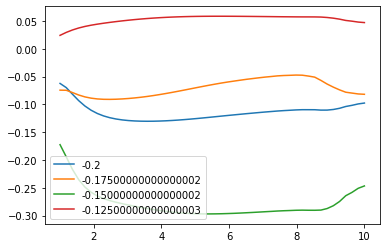

In [123]:
oiii_sims = []
ns = np.arange(-0.2, -0.1, 0.025)
for n in ns:
    oiii_sims.append(np.loadtxt(f"../res/res/oiii{n}.sim"))
    
for sim, cor in zip(oiii_sims, ns):
    plot_cors(sim[:,:-1], sim[:,-1], plt, label=str(cor))
plt.legend()

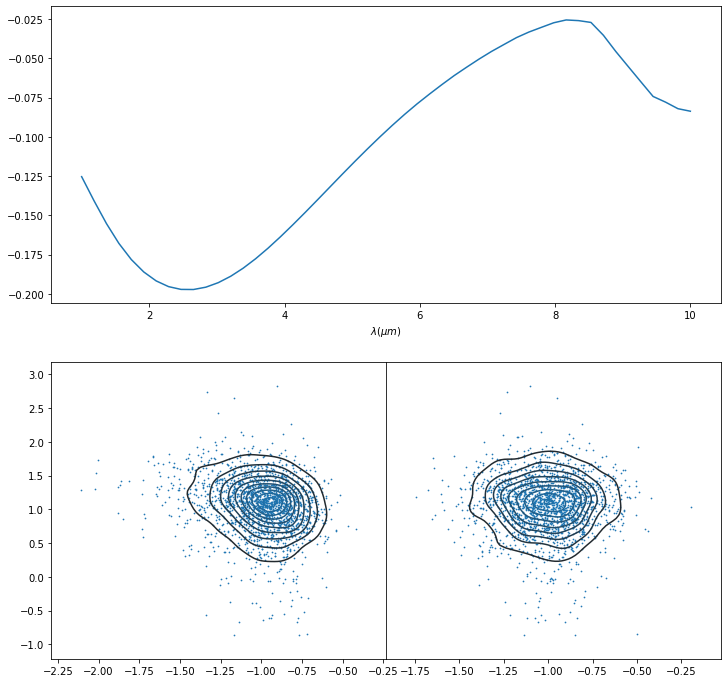

In [171]:
fig = plt.figure(figsize=(12,12))
ax1 = plt.subplot(211)
ax2 = plt.subplot(223)
ax3 = plt.subplot(224)

oiii_sim = oiii_res
oiii_sim_logew = np.log10(oiii_["ew_oiii_5007"])
oiii_sim_ans_ = np.array([analysis_(i) for i in oiii_sim])
# oiii_sim_ans = np.array([analysis(i) for i in oiii_sim])
oiii_sim_cors = [parcor([oiii_sim_logew, oiii_sim_ans_[:,i], oiii_loglbol, oiii_["logbh_hb_vp06"]])[0,1] 
    for i in range(len(oiii_sim_ans_[0,:]))]
x = np.linspace(1,10)
ax1.plot(x, oiii_sim_cors)
ax1.set_xlabel(r"$\lambda(\mu m)$")

indmax = np.argmax(oiii_sim_cors)
indmin = np.argmin(oiii_sim_cors)

sb.kdeplot(oiii_sim_ans_[:,indmin], oiii_sim_logew, ax=ax2)
ax2.scatter(oiii_sim_ans_[:,indmin], oiii_sim_logew, s=0.5)

sb.kdeplot(oiii_sim_ans_[:,indmax], oiii_sim_logew, ax=ax3)
ax3.scatter(oiii_sim_ans_[:,indmax], oiii_sim_logew, s=0.5)
ax3.set_yticks([])

plt.subplots_adjust(wspace=0)